In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score,roc_curve,recall_score,roc_auc_score,auc,confusion_matrix,cohen_kappa_score, f1_score, precision_score,matthews_corrcoef 
from tqdm import tqdm
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectPercentile, f_classif, chi2, SelectFromModel, SelectKBest
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Optional imports for preprocessing and visualization
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import joblib

In [2]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [3]:
df_rm_base=pd.read_csv("./Radiomics_Features_Base.csv")
df_dl_base=pd.read_csv("./Deep_Learning_Features_Base.csv")

df_rm_aug=pd.read_csv("./Radiomics_Feature_Augmented.csv")
df_dl_aug=pd.read_csv("./Deep_Learning_Features_Augmented.csv")

df_rm_base_Train=pd.read_csv("./Radiomics_Features_Train_Base.csv")
df_dl_base_Train=pd.read_csv("./Deep_Learning_Features_Train_Base.csv")

df_rm_aug_Train=pd.read_csv("./Radiomics_Features_Train_Augmented.csv")
df_dl_aug_Train=pd.read_csv("./Deep_Learning_Features_Train_Augmented.csv")

df_rm_base_Test=pd.read_csv("./Radiomics_Features_Test_Base.csv")
df_dl_base_Test=pd.read_csv("./Deep_Learning_Test_Base.csv")

df_dl_aug_Test=pd.read_csv("./Deep_Learning_Test_Augmented.csv")
df_rm_aug_Test=pd.read_csv("./Radiomics_Features_Test_Augmented.csv")

In [4]:
print(df_rm_base.shape,df_dl_base.shape,df_rm_aug.shape,df_dl_aug.shape)
print(df_rm_base_Train.shape,df_dl_base_Train.shape,df_rm_aug_Train.shape,df_dl_aug_Train.shape)
print(df_rm_base_Test.shape,df_dl_base_Test.shape,df_rm_aug_Test.shape,df_dl_aug_Test.shape)


(1393, 1221) (1393, 129) (5620, 1220) (5620, 129)
(1114, 1221) (1114, 129) (4496, 1220) (4496, 129)
(279, 1221) (279, 128) (1124, 1220) (1124, 128)


In [5]:
DL_20_top_feature_names=['85', '105', '63', '118', '84', '20', '30', '32', '45', '127', '83', '107', '36', '5', '61', '103', '35', '106', '57', '81']
DL_10_top_feature_names=['85', '105', '63', '118', '84', '20', '30', '32', '45', '127']

RM_200_top_feature_names=['log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLH_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_glrlm_RunEntropy', 'original_shape_Maximum2DDiameterColumn', 'log-sigma-5-0-mm-3D_glrlm_RunVariance', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_DependenceNonUniformity', 'log-sigma-5-0-mm-3D_firstorder_InterquartileRange', 'original_shape_LeastAxisLength', 'log-sigma-3-0-mm-3D_firstorder_TotalEnergy', 'log-sigma-5-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmphasis', 'wavelet-LLH_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Range', 'original_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_TotalEnergy', 'wavelet-LHL_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_gldm_LargeDependenceEmphasis', 'original_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glcm_DifferenceEntropy', 'wavelet-LHH_firstorder_TotalEnergy', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glcm_Imc1', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Skewness', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'wavelet-LHL_glcm_Idmn', 'wavelet-LLL_firstorder_Minimum', 'wavelet-LLH_firstorder_Energy', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy', 'wavelet-HLL_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-5-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-2-0-mm-3D_glszm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Minimum', 'log-sigma-4-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-HHH_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glcm_Idm', 'wavelet-LLH_glrlm_ShortRunEmphasis', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformityNormalized', 'original_shape_Maximum2DDiameterRow', 'wavelet-LLL_firstorder_Maximum', 'log-sigma-2-0-mm-3D_firstorder_10Percentile', 'original_shape_Flatness', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'original_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_firstorder_Energy', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'original_shape_SurfaceVolumeRatio', 'log-sigma-3-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Contrast', 'log-sigma-4-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Skewness', 'wavelet-HLL_glrlm_GrayLevelNonUniformity', 'wavelet-LHH_glszm_ZonePercentage', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LLL_gldm_DependenceNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformity', 'log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LLH_glcm_DifferenceAverage', 'wavelet-LLL_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-HLL_firstorder_Mean', 'log-sigma-4-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-4-0-mm-3D_glcm_JointEnergy', 'original_shape_Maximum2DDiameterSlice', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis', 'wavelet-HLL_firstorder_InterquartileRange', 'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-3-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-4-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Median', 'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-HLL_firstorder_Energy', 'log-sigma-4-0-mm-3D_glcm_Correlation', 'original_firstorder_Minimum', 'wavelet-LHH_gldm_DependenceNonUniformity', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glcm_Imc2', 'wavelet-LHL_glcm_MaximumProbability', 'wavelet-HHH_glrlm_GrayLevelNonUniformity', 'wavelet-HLH_glrlm_GrayLevelNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_Median', 'wavelet-LLL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis', 'wavelet-LHL_firstorder_Energy', 'log-sigma-3-0-mm-3D_glcm_DifferenceEntropy', 'wavelet-LLL_firstorder_Energy', 'log-sigma-5-0-mm-3D_glcm_MaximumProbability', 'log-sigma-4-0-mm-3D_firstorder_10Percentile', 'log-sigma-1-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glrlm_RunLengthNonUniformity', 'wavelet-LLH_glcm_Idn', 'log-sigma-5-0-mm-3D_glszm_GrayLevelVariance', 'original_glcm_Contrast', 'wavelet-HLL_firstorder_10Percentile', 'log-sigma-3-0-mm-3D_firstorder_Skewness', 'log-sigma-3-0-mm-3D_gldm_DependenceEntropy', 'wavelet-LLL_gldm_HighGrayLevelEmphasis', 'wavelet-HLL_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Variance', 'log-sigma-3-0-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glrlm_GrayLevelVariance', 'wavelet-LLL_firstorder_Variance', 'log-sigma-4-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'wavelet-LLL_firstorder_TotalEnergy', 'log-sigma-1-0-mm-3D_firstorder_Maximum', 'log-sigma-4-0-mm-3D_glrlm_RunPercentage', 'log-sigma-1-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_glszm_ZonePercentage', 'wavelet-LLH_glcm_InverseVariance', 'log-sigma-2-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Idn', 'wavelet-LLH_firstorder_Range', 'log-sigma-1-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-HLL_firstorder_Range', 'log-sigma-4-0-mm-3D_firstorder_Mean', 'log-sigma-5-0-mm-3D_firstorder_Maximum', 'original_firstorder_Range', 'log-sigma-4-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'log-sigma-1-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LLH_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_glcm_Imc1', 'wavelet-LLH_glcm_Correlation', 'log-sigma-5-0-mm-3D_gldm_GrayLevelVariance', 'wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_gldm_SmallDependenceEmphasis', 'wavelet-HHH_glrlm_LongRunEmphasis', 'wavelet-LLL_firstorder_Range', 'log-sigma-3-0-mm-3D_firstorder_10Percentile', 'log-sigma-5-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glcm_ClusterShade', 'log-sigma-1-0-mm-3D_gldm_LowGrayLevelEmphasis', 'original_firstorder_MeanAbsoluteDeviation', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_glcm_ClusterShade', 'log-sigma-5-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_glszm_ZonePercentage', 'log-sigma-1-0-mm-3D_firstorder_Range', 'wavelet-LLL_firstorder_Skewness', 'log-sigma-3-0-mm-3D_firstorder_Mean', 'original_shape_Maximum3DDiameter', 'log-sigma-4-0-mm-3D_firstorder_InterquartileRange', 'original_shape_MinorAxisLength', 'wavelet-LLL_glrlm_HighGrayLevelRunEmphasis', 'wavelet-LLL_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Minimum', 'log-sigma-5-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-2-0-mm-3D_firstorder_Variance', 'log-sigma-4-0-mm-3D_firstorder_Range', 'log-sigma-3-0-mm-3D_glcm_ClusterTendency', 'original_glcm_ClusterTendency', 'log-sigma-1-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HLL_firstorder_Variance', 'wavelet-LLH_firstorder_Maximum', 'log-sigma-3-0-mm-3D_glrlm_LongRunEmphasis', 'wavelet-LLH_firstorder_MeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_glszm_GrayLevelNonUniformity', 'log-sigma-1-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LLH_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glcm_SumSquares', 'log-sigma-1-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LHL_glcm_DifferenceVariance', 'wavelet-LHL_glcm_ClusterProminence', 'log-sigma-5-0-mm-3D_glcm_InverseVariance', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glrlm_HighGrayLevelRunEmphasis', 'log-sigma-1-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Minimum', 'log-sigma-1-0-mm-3D_glcm_ClusterTendency', 'log-sigma-3-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-1-0-mm-3D_glcm_Idm', 'wavelet-HLH_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_glrlm_GrayLevelVariance', 'original_glcm_SumEntropy', 'wavelet-LHL_glcm_Id', 'log-sigma-1-0-mm-3D_gldm_GrayLevelVariance']
RM_100_top_feature_names=['log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLH_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_glrlm_RunEntropy', 'original_shape_Maximum2DDiameterColumn', 'log-sigma-5-0-mm-3D_glrlm_RunVariance', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_DependenceNonUniformity', 'log-sigma-5-0-mm-3D_firstorder_InterquartileRange', 'original_shape_LeastAxisLength', 'log-sigma-3-0-mm-3D_firstorder_TotalEnergy', 'log-sigma-5-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmphasis', 'wavelet-LLH_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Range', 'original_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_TotalEnergy', 'wavelet-LHL_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_gldm_LargeDependenceEmphasis', 'original_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glcm_DifferenceEntropy', 'wavelet-LHH_firstorder_TotalEnergy', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glcm_Imc1', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Skewness', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'wavelet-LHL_glcm_Idmn', 'wavelet-LLL_firstorder_Minimum', 'wavelet-LLH_firstorder_Energy', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy', 'wavelet-HLL_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-5-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-2-0-mm-3D_glszm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Minimum', 'log-sigma-4-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-HHH_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glcm_Idm', 'wavelet-LLH_glrlm_ShortRunEmphasis', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformityNormalized', 'original_shape_Maximum2DDiameterRow', 'wavelet-LLL_firstorder_Maximum', 'log-sigma-2-0-mm-3D_firstorder_10Percentile', 'original_shape_Flatness', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'original_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_firstorder_Energy', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'original_shape_SurfaceVolumeRatio', 'log-sigma-3-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Contrast', 'log-sigma-4-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Skewness', 'wavelet-HLL_glrlm_GrayLevelNonUniformity', 'wavelet-LHH_glszm_ZonePercentage', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LLL_gldm_DependenceNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformity', 'log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LLH_glcm_DifferenceAverage', 'wavelet-LLL_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-HLL_firstorder_Mean', 'log-sigma-4-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-4-0-mm-3D_glcm_JointEnergy', 'original_shape_Maximum2DDiameterSlice', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis', 'wavelet-HLL_firstorder_InterquartileRange', 'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-3-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-4-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Median', 'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-HLL_firstorder_Energy', 'log-sigma-4-0-mm-3D_glcm_Correlation', 'original_firstorder_Minimum', 'wavelet-LHH_gldm_DependenceNonUniformity', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glcm_Imc2', 'wavelet-LHL_glcm_MaximumProbability', 'wavelet-HHH_glrlm_GrayLevelNonUniformity', 'wavelet-HLH_glrlm_GrayLevelNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_Median', 'wavelet-LLL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis']

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



DL_20_top_feature_names=['85', '105', '63', '118', '84', '20', '30', '32', '45', '127', '83', '107', '36', '5', '61', '103', '35', '106', '57', '81']
DL_10_top_feature_names=['85', '105', '63', '118', '84', '20', '30', '32', '45', '127']

RM_200_top_feature_names=['log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLH_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_glrlm_RunEntropy', 'original_shape_Maximum2DDiameterColumn', 'log-sigma-5-0-mm-3D_glrlm_RunVariance', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_DependenceNonUniformity', 'log-sigma-5-0-mm-3D_firstorder_InterquartileRange', 'original_shape_LeastAxisLength', 'log-sigma-3-0-mm-3D_firstorder_TotalEnergy', 'log-sigma-5-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmphasis', 'wavelet-LLH_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Range', 'original_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_TotalEnergy', 'wavelet-LHL_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_gldm_LargeDependenceEmphasis', 'original_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glcm_DifferenceEntropy', 'wavelet-LHH_firstorder_TotalEnergy', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glcm_Imc1', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Skewness', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'wavelet-LHL_glcm_Idmn', 'wavelet-LLL_firstorder_Minimum', 'wavelet-LLH_firstorder_Energy', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy', 'wavelet-HLL_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-5-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-2-0-mm-3D_glszm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Minimum', 'log-sigma-4-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-HHH_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glcm_Idm', 'wavelet-LLH_glrlm_ShortRunEmphasis', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformityNormalized', 'original_shape_Maximum2DDiameterRow', 'wavelet-LLL_firstorder_Maximum', 'log-sigma-2-0-mm-3D_firstorder_10Percentile', 'original_shape_Flatness', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'original_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_firstorder_Energy', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'original_shape_SurfaceVolumeRatio', 'log-sigma-3-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Contrast', 'log-sigma-4-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Skewness', 'wavelet-HLL_glrlm_GrayLevelNonUniformity', 'wavelet-LHH_glszm_ZonePercentage', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LLL_gldm_DependenceNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformity', 'log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LLH_glcm_DifferenceAverage', 'wavelet-LLL_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-HLL_firstorder_Mean', 'log-sigma-4-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-4-0-mm-3D_glcm_JointEnergy', 'original_shape_Maximum2DDiameterSlice', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis', 'wavelet-HLL_firstorder_InterquartileRange', 'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-3-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-4-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Median', 'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-HLL_firstorder_Energy', 'log-sigma-4-0-mm-3D_glcm_Correlation', 'original_firstorder_Minimum', 'wavelet-LHH_gldm_DependenceNonUniformity', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glcm_Imc2', 'wavelet-LHL_glcm_MaximumProbability', 'wavelet-HHH_glrlm_GrayLevelNonUniformity', 'wavelet-HLH_glrlm_GrayLevelNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_Median', 'wavelet-LLL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis', 'wavelet-LHL_firstorder_Energy', 'log-sigma-3-0-mm-3D_glcm_DifferenceEntropy', 'wavelet-LLL_firstorder_Energy', 'log-sigma-5-0-mm-3D_glcm_MaximumProbability', 'log-sigma-4-0-mm-3D_firstorder_10Percentile', 'log-sigma-1-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glrlm_RunLengthNonUniformity', 'wavelet-LLH_glcm_Idn', 'log-sigma-5-0-mm-3D_glszm_GrayLevelVariance', 'original_glcm_Contrast', 'wavelet-HLL_firstorder_10Percentile', 'log-sigma-3-0-mm-3D_firstorder_Skewness', 'log-sigma-3-0-mm-3D_gldm_DependenceEntropy', 'wavelet-LLL_gldm_HighGrayLevelEmphasis', 'wavelet-HLL_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Variance', 'log-sigma-3-0-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glrlm_GrayLevelVariance', 'wavelet-LLL_firstorder_Variance', 'log-sigma-4-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'wavelet-LLL_firstorder_TotalEnergy', 'log-sigma-1-0-mm-3D_firstorder_Maximum', 'log-sigma-4-0-mm-3D_glrlm_RunPercentage', 'log-sigma-1-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_glszm_ZonePercentage', 'wavelet-LLH_glcm_InverseVariance', 'log-sigma-2-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Idn', 'wavelet-LLH_firstorder_Range', 'log-sigma-1-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-HLL_firstorder_Range', 'log-sigma-4-0-mm-3D_firstorder_Mean', 'log-sigma-5-0-mm-3D_firstorder_Maximum', 'original_firstorder_Range', 'log-sigma-4-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'log-sigma-1-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LLH_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_glcm_Imc1', 'wavelet-LLH_glcm_Correlation', 'log-sigma-5-0-mm-3D_gldm_GrayLevelVariance', 'wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_gldm_SmallDependenceEmphasis', 'wavelet-HHH_glrlm_LongRunEmphasis', 'wavelet-LLL_firstorder_Range', 'log-sigma-3-0-mm-3D_firstorder_10Percentile', 'log-sigma-5-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glcm_ClusterShade', 'log-sigma-1-0-mm-3D_gldm_LowGrayLevelEmphasis', 'original_firstorder_MeanAbsoluteDeviation', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_glcm_ClusterShade', 'log-sigma-5-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_glszm_ZonePercentage', 'log-sigma-1-0-mm-3D_firstorder_Range', 'wavelet-LLL_firstorder_Skewness', 'log-sigma-3-0-mm-3D_firstorder_Mean', 'original_shape_Maximum3DDiameter', 'log-sigma-4-0-mm-3D_firstorder_InterquartileRange', 'original_shape_MinorAxisLength', 'wavelet-LLL_glrlm_HighGrayLevelRunEmphasis', 'wavelet-LLL_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Minimum', 'log-sigma-5-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-2-0-mm-3D_firstorder_Variance', 'log-sigma-4-0-mm-3D_firstorder_Range', 'log-sigma-3-0-mm-3D_glcm_ClusterTendency', 'original_glcm_ClusterTendency', 'log-sigma-1-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HLL_firstorder_Variance', 'wavelet-LLH_firstorder_Maximum', 'log-sigma-3-0-mm-3D_glrlm_LongRunEmphasis', 'wavelet-LLH_firstorder_MeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_glszm_GrayLevelNonUniformity', 'log-sigma-1-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LLH_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glcm_SumSquares', 'log-sigma-1-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LHL_glcm_DifferenceVariance', 'wavelet-LHL_glcm_ClusterProminence', 'log-sigma-5-0-mm-3D_glcm_InverseVariance', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glrlm_HighGrayLevelRunEmphasis', 'log-sigma-1-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Minimum', 'log-sigma-1-0-mm-3D_glcm_ClusterTendency', 'log-sigma-3-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-1-0-mm-3D_glcm_Idm', 'wavelet-HLH_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_glrlm_GrayLevelVariance', 'original_glcm_SumEntropy', 'wavelet-LHL_glcm_Id', 'log-sigma-1-0-mm-3D_gldm_GrayLevelVariance']
RM_100_top_feature_names=['log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLH_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_glrlm_RunEntropy', 'original_shape_Maximum2DDiameterColumn', 'log-sigma-5-0-mm-3D_glrlm_RunVariance', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_DependenceNonUniformity', 'log-sigma-5-0-mm-3D_firstorder_InterquartileRange', 'original_shape_LeastAxisLength', 'log-sigma-3-0-mm-3D_firstorder_TotalEnergy', 'log-sigma-5-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmphasis', 'wavelet-LLH_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Range', 'original_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_TotalEnergy', 'wavelet-LHL_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_gldm_LargeDependenceEmphasis', 'original_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glcm_DifferenceEntropy', 'wavelet-LHH_firstorder_TotalEnergy', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glcm_Imc1', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Skewness', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'wavelet-LHL_glcm_Idmn', 'wavelet-LLL_firstorder_Minimum', 'wavelet-LLH_firstorder_Energy', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy', 'wavelet-HLL_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-5-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-2-0-mm-3D_glszm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Minimum', 'log-sigma-4-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-HHH_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glcm_Idm', 'wavelet-LLH_glrlm_ShortRunEmphasis', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformityNormalized', 'original_shape_Maximum2DDiameterRow', 'wavelet-LLL_firstorder_Maximum', 'log-sigma-2-0-mm-3D_firstorder_10Percentile', 'original_shape_Flatness', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'original_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_firstorder_Energy', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'original_shape_SurfaceVolumeRatio', 'log-sigma-3-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Contrast', 'log-sigma-4-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Skewness', 'wavelet-HLL_glrlm_GrayLevelNonUniformity', 'wavelet-LHH_glszm_ZonePercentage', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LLL_gldm_DependenceNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformity', 'log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LLH_glcm_DifferenceAverage', 'wavelet-LLL_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-HLL_firstorder_Mean', 'log-sigma-4-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-4-0-mm-3D_glcm_JointEnergy', 'original_shape_Maximum2DDiameterSlice', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis', 'wavelet-HLL_firstorder_InterquartileRange', 'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-3-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-4-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Median', 'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-HLL_firstorder_Energy', 'log-sigma-4-0-mm-3D_glcm_Correlation', 'original_firstorder_Minimum', 'wavelet-LHH_gldm_DependenceNonUniformity', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glcm_Imc2', 'wavelet-LHL_glcm_MaximumProbability', 'wavelet-HHH_glrlm_GrayLevelNonUniformity', 'wavelet-HLH_glrlm_GrayLevelNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_Median', 'wavelet-LLL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis']

X_1218=df_rm_base_Train.drop(columns=['Patient_id','Malignancy'])
Y_Base=df_rm_base_Train['Malignancy']
X_128=df_dl_base_Train.drop(columns='Patient_id')
X_20=df_dl_base_Train[DL_20_top_feature_names]
X_10=df_dl_base_Train[DL_10_top_feature_names]
X_200=df_rm_base_Train[RM_200_top_feature_names]
X_100=df_rm_base_Train[RM_100_top_feature_names]
# List of model names
Test_1218=df_rm_base_Test.drop(columns=['Patient_id','Malignancy'])
Test_128=df_dl_base_Test
Test_20=df_dl_base_Test[DL_20_top_feature_names]
Test_10=df_dl_base_Test[DL_10_top_feature_names]
Test_200=df_rm_base_Test[RM_200_top_feature_names]
Test_100=df_rm_base_Test[RM_100_top_feature_names]
Test_Y_Base=df_rm_base_Test['Malignancy']

models = {
    'Radiomics_1218_Feature': [ X_1218,Y_Base,Test_1218],
    'Radiomics_200_Features': [ X_200,Y_Base,Test_200],
    'Radiomics_100_Features': [ X_100,Y_Base,Test_100],
    'Fuse_1218_128_Features': [ pd.concat([X_1218, X_128], axis=1),Y_Base,pd.concat([Test_1218, Test_128], axis=1)],
    'Fuse_1218_20_Features': [ pd.concat([X_1218, X_20], axis=1),Y_Base,pd.concat([Test_1218, Test_20], axis=1)],
    'Fuse_1218_10_Features': [ pd.concat([X_1218, X_10], axis=1),Y_Base,pd.concat([Test_1218, Test_10], axis=1)],
    'Fuse_200_128_Features': [ pd.concat([X_200, X_128], axis=1),Y_Base,pd.concat([Test_200, Test_128], axis=1)],
    'Fuse_200_20_Features': [ pd.concat([X_200, X_20], axis=1),Y_Base,pd.concat([Test_200, Test_20], axis=1)],
    'Fuse_200_10_Features': [ pd.concat([X_200, X_10], axis=1),Y_Base,pd.concat([Test_200, Test_10], axis=1)],
    'Fuse_100_128_Features': [ pd.concat([X_100, X_128], axis=1),Y_Base,pd.concat([Test_100, Test_128], axis=1)],
    'Fuse_100_20_Features': [ pd.concat([X_100, X_20], axis=1),Y_Base,pd.concat([Test_100, Test_20], axis=1)],
    'Fuse_100_10_Features': [ pd.concat([X_100, X_10], axis=1),Y_Base,pd.concat([Test_100, Test_10], axis=1)]
}



# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}


Base Model  With Five fold Validation Without Oversampling 

In [7]:
performance_metrics_Method1 = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("## Base Model  With Five fold Validation Without Oversampling ##")
best_model_accuracy = 0
best_model_Name = None
best_model_precision=0
best_model_recall=0
best_model_f1=0
for name, model_det in models.items():
    X = model_det[0]
    y = model_det[1]
    X_model_Test=model_det[2]
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    best_accuracy = 0
    best_model = None
    best_precision=0
    best_recall=0
    best_f1=0
    i=1
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        

        # Standardize the data if needed

        # Train the model
        RF = RandomForestClassifier(random_state=42, **rf_hyperparameters)
        RF.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = RF.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)

    # Check if current model is the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_precision=precision
            best_recall=recall
            best_f1=f1
            best_model = RF
        
        #print(f"Performance of {name} model at Fold {i}: {accuracy:.4f} {precision:.4f} {recall:.4f} {f1:.4f}")
        i=i+1
    #print("-" * 30)
# Save the best model
    joblib.dump(best_model, f'Method_1_{name}_Base.pkl')
    performance_metrics_Method1[name]=[best_accuracy,best_precision,best_recall,best_f1]
    print(f" Training Best Performance of {name} model : {best_accuracy:.4f} {best_precision:.4f} {best_recall:.4f} {best_f1:.4f}")
    
    y_pred_Test=best_model.predict(X_model_Test)
    df_predictions = pd.DataFrame({ 'Predicted Label': y_pred_Test})
    df_predictions.to_csv(f'Method_1_Base_{name}_predictions.csv', index=False)
    print("Test Accuracy:",accuracy_score(Test_Y_Base,y_pred_Test))
    print("Test precision:",precision_score(Test_Y_Base,y_pred_Test))
    print("Test recall:",recall_score(Test_Y_Base,y_pred_Test))
    print("Test F1:",f1_score(Test_Y_Base,y_pred_Test))
    print("#" * 30)
        # Evaluate the model
       
        


## Base Model  With Five fold Validation Without Oversampling ##
 Training Best Performance of Radiomics_1218_Feature model : 0.7668 0.3571 0.1042 0.1613
Test Accuracy: 0.7813620071684588
Test precision: 0.48
Test recall: 0.2
Test F1: 0.2823529411764706
##############################
 Training Best Performance of Radiomics_200_Features model : 0.7613 0.5417 0.2364 0.3291
Test Accuracy: 0.7741935483870968
Test precision: 0.42857142857142855
Test recall: 0.15
Test F1: 0.2222222222222222
##############################
 Training Best Performance of Radiomics_100_Features model : 0.7623 0.2727 0.0625 0.1017
Test Accuracy: 0.7885304659498208
Test precision: 0.5238095238095238
Test recall: 0.18333333333333332
Test F1: 0.2716049382716049
##############################
 Training Best Performance of Fuse_1218_128_Features model : 0.9148 0.8718 0.7083 0.7816
Test Accuracy: 0.910394265232975
Test precision: 0.8070175438596491
Test recall: 0.7666666666666667
Test F1: 0.7863247863247863
############

In [8]:
print(f"Best Performance of {best_model_Name} model : {best_model_accuracy:.4f} {best_model_precision:.4f} {best_model_recall:.4f} {best_model_f1:.4f}")

Best Performance of None model : 0.0000 0.0000 0.0000 0.0000


In [9]:

print("## Base Model  With Five fold Validation  Oversampling Before Fold ##")

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}
performance_metrics_Method2 = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model_det in models.items():
    X = model_det[0]
    y = model_det[1]
    X_model_Test=model_det[2]
    best_accuracy = 0
    best_model = None
    best_precision=0
    best_recall=0
    best_f1=0
   
    i=1
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Use RandomOverSampler to oversample the minority class

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
    X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
    df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)
    X = df_resampled.drop(columns='Malignancy')
    y = df_resampled['Malignancy']

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        

        # Standardize the data if needed

        # Train the model
        RF = RandomForestClassifier(random_state=42, **rf_hyperparameters)
        RF.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = RF.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)

    # Check if current model is the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_precision=precision
            best_recall=recall
            best_f1=f1
            best_model = RF
        
        #print(f"Performance of {name} model at Fold {i}: {accuracy:.4f} {precision:.4f} {recall:.4f} {f1:.4f}")
        i=i+1
    #print("-" * 30)
# Save the best model
    #joblib.dump(best_model, f'{name}_Base.pkl')
    performance_metrics_Method2[name]=[best_accuracy,best_precision,best_recall,best_f1]
    print(f"Best Performance of {name} model : {best_accuracy:.4f} {best_precision:.4f} {best_recall:.4f} {best_f1:.4f}")
    print("#" * 30)
    joblib.dump(best_model, f'Method_2_{name}_Base.pkl')
    performance_metrics_Method1[name]=[best_accuracy,best_precision,best_recall,best_f1]
    print(f" Training Best Performance of {name} model : {best_accuracy:.4f} {best_precision:.4f} {best_recall:.4f} {best_f1:.4f}")
    
    y_pred_Test=best_model.predict(X_model_Test)
    df_predictions = pd.DataFrame({ 'Predicted Label': y_pred_Test})
    df_predictions.to_csv(f'Method_2_Base_{name}_predictions.csv', index=False)
    print("Test Accuracy:",accuracy_score(Test_Y_Base,y_pred_Test))
    print("Test precision:",precision_score(Test_Y_Base,y_pred_Test))
    print("Test recall:",recall_score(Test_Y_Base,y_pred_Test))
    print("Test F1:",f1_score(Test_Y_Base,y_pred_Test))
    print("#" * 30)

## Base Model  With Five fold Validation  Oversampling Before Fold ##
Best Performance of Radiomics_1218_Feature model : 0.9154 0.8868 0.9338 0.9097
##############################
 Training Best Performance of Radiomics_1218_Feature model : 0.9154 0.8868 0.9338 0.9097
Test Accuracy: 0.7670250896057348
Test precision: 0.43902439024390244
Test recall: 0.3
Test F1: 0.3564356435643564
##############################
Best Performance of Radiomics_200_Features model : 0.9063 0.8704 0.9338 0.9010
##############################
 Training Best Performance of Radiomics_200_Features model : 0.9063 0.8704 0.9338 0.9010
Test Accuracy: 0.7598566308243727
Test precision: 0.4186046511627907
Test recall: 0.3
Test F1: 0.34951456310679613
##############################
Best Performance of Radiomics_100_Features model : 0.9124 0.8720 0.9470 0.9079
##############################
 Training Best Performance of Radiomics_100_Features model : 0.9124 0.8720 0.9470 0.9079
Test Accuracy: 0.7562724014336918
Test pr

In [10]:

print("## Base Model  With Five fold Validation  Oversampling in Fold ##")
# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}
performance_metrics_Method3= {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model_det in models.items():
    X = model_det[0]
    y = model_det[1]
    X_model_Test=model_det[2]
    best_accuracy = 0
    best_model = None
    best_precision=0
    best_recall=0
    best_f1=0
   
    i=1
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        oversampler = RandomOverSampler(random_state=42)
        X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
        # Standardize the data if needed

        # Train the model
        RF = RandomForestClassifier(random_state=42, **rf_hyperparameters)
        RF.fit(X_train_resampled, y_train_resampled)

        # Make predictions on the test set
        y_pred = RF.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)

    # Check if current model is the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_precision=precision
            best_recall=recall
            best_f1=f1
            best_model = RF
        
        #print(f"Performance of {name} model at Fold {i}: {accuracy:.4f} {precision:.4f} {recall:.4f} {f1:.4f}")
        i=i+1
    #print("-" * 30)
# Save the best model
    #joblib.dump(best_model, f'{name}_Base.pkl')
    
   
    joblib.dump(best_model, f'Method_3_{name}_Base.pkl')
    performance_metrics_Method1[name]=[best_accuracy,best_precision,best_recall,best_f1]
    print(f" Training Best Performance of {name} model : {best_accuracy:.4f} {best_precision:.4f} {best_recall:.4f} {best_f1:.4f}")
    
    y_pred_Test=best_model.predict(X_model_Test)
    df_predictions = pd.DataFrame({ 'Predicted Label': y_pred_Test})
    df_predictions.to_csv(f'Method_3_Base_{name}_predictions.csv', index=False)
    print("Test Accuracy:",accuracy_score(Test_Y_Base,y_pred_Test))
    print("Test precision:",precision_score(Test_Y_Base,y_pred_Test))
    print("Test recall:",recall_score(Test_Y_Base,y_pred_Test))
    print("Test F1:",f1_score(Test_Y_Base,y_pred_Test))
    print("#" * 30)

## Base Model  With Five fold Validation  Oversampling in Fold ##
 Training Best Performance of Radiomics_1218_Feature model : 0.7623 0.3810 0.1667 0.2319
Test Accuracy: 0.7706093189964157
Test precision: 0.4411764705882353
Test recall: 0.25
Test F1: 0.3191489361702128
##############################
 Training Best Performance of Radiomics_200_Features model : 0.7523 0.5000 0.3091 0.3820
Test Accuracy: 0.7491039426523297
Test precision: 0.35294117647058826
Test recall: 0.2
Test F1: 0.2553191489361702
##############################
 Training Best Performance of Radiomics_100_Features model : 0.7668 0.4167 0.2083 0.2778
Test Accuracy: 0.7526881720430108
Test precision: 0.38461538461538464
Test recall: 0.25
Test F1: 0.30303030303030304
##############################
 Training Best Performance of Fuse_1218_128_Features model : 0.9148 0.8222 0.7708 0.7957
Test Accuracy: 0.8960573476702509
Test precision: 0.7627118644067796
Test recall: 0.75
Test F1: 0.7563025210084033
#######################

In [11]:
DL_20_top_feature_names=['85', '105', '63', '118', '84', '20', '30', '32', '45', '127', '83', '107', '36', '5', '61', '103', '35', '106', '57', '81']
DL_10_top_feature_names=['85', '105', '63', '118', '84', '20', '30', '32', '45', '127']

RM_200_top_feature_names=['log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLH_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_glrlm_RunEntropy', 'original_shape_Maximum2DDiameterColumn', 'log-sigma-5-0-mm-3D_glrlm_RunVariance', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_DependenceNonUniformity', 'log-sigma-5-0-mm-3D_firstorder_InterquartileRange', 'original_shape_LeastAxisLength', 'log-sigma-3-0-mm-3D_firstorder_TotalEnergy', 'log-sigma-5-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmphasis', 'wavelet-LLH_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Range', 'original_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_TotalEnergy', 'wavelet-LHL_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_gldm_LargeDependenceEmphasis', 'original_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glcm_DifferenceEntropy', 'wavelet-LHH_firstorder_TotalEnergy', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glcm_Imc1', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Skewness', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'wavelet-LHL_glcm_Idmn', 'wavelet-LLL_firstorder_Minimum', 'wavelet-LLH_firstorder_Energy', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy', 'wavelet-HLL_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-5-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-2-0-mm-3D_glszm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Minimum', 'log-sigma-4-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-HHH_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glcm_Idm', 'wavelet-LLH_glrlm_ShortRunEmphasis', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformityNormalized', 'original_shape_Maximum2DDiameterRow', 'wavelet-LLL_firstorder_Maximum', 'log-sigma-2-0-mm-3D_firstorder_10Percentile', 'original_shape_Flatness', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'original_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_firstorder_Energy', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'original_shape_SurfaceVolumeRatio', 'log-sigma-3-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Contrast', 'log-sigma-4-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Skewness', 'wavelet-HLL_glrlm_GrayLevelNonUniformity', 'wavelet-LHH_glszm_ZonePercentage', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LLL_gldm_DependenceNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformity', 'log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LLH_glcm_DifferenceAverage', 'wavelet-LLL_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-HLL_firstorder_Mean', 'log-sigma-4-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-4-0-mm-3D_glcm_JointEnergy', 'original_shape_Maximum2DDiameterSlice', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis', 'wavelet-HLL_firstorder_InterquartileRange', 'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-3-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-4-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Median', 'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-HLL_firstorder_Energy', 'log-sigma-4-0-mm-3D_glcm_Correlation', 'original_firstorder_Minimum', 'wavelet-LHH_gldm_DependenceNonUniformity', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glcm_Imc2', 'wavelet-LHL_glcm_MaximumProbability', 'wavelet-HHH_glrlm_GrayLevelNonUniformity', 'wavelet-HLH_glrlm_GrayLevelNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_Median', 'wavelet-LLL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis', 'wavelet-LHL_firstorder_Energy', 'log-sigma-3-0-mm-3D_glcm_DifferenceEntropy', 'wavelet-LLL_firstorder_Energy', 'log-sigma-5-0-mm-3D_glcm_MaximumProbability', 'log-sigma-4-0-mm-3D_firstorder_10Percentile', 'log-sigma-1-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glrlm_RunLengthNonUniformity', 'wavelet-LLH_glcm_Idn', 'log-sigma-5-0-mm-3D_glszm_GrayLevelVariance', 'original_glcm_Contrast', 'wavelet-HLL_firstorder_10Percentile', 'log-sigma-3-0-mm-3D_firstorder_Skewness', 'log-sigma-3-0-mm-3D_gldm_DependenceEntropy', 'wavelet-LLL_gldm_HighGrayLevelEmphasis', 'wavelet-HLL_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Variance', 'log-sigma-3-0-mm-3D_glrlm_ShortRunHighGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glrlm_GrayLevelVariance', 'wavelet-LLL_firstorder_Variance', 'log-sigma-4-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'wavelet-LLL_firstorder_TotalEnergy', 'log-sigma-1-0-mm-3D_firstorder_Maximum', 'log-sigma-4-0-mm-3D_glrlm_RunPercentage', 'log-sigma-1-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_glszm_ZonePercentage', 'wavelet-LLH_glcm_InverseVariance', 'log-sigma-2-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Idn', 'wavelet-LLH_firstorder_Range', 'log-sigma-1-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-HLL_firstorder_Range', 'log-sigma-4-0-mm-3D_firstorder_Mean', 'log-sigma-5-0-mm-3D_firstorder_Maximum', 'original_firstorder_Range', 'log-sigma-4-0-mm-3D_glrlm_RunVariance', 'log-sigma-5-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'log-sigma-1-0-mm-3D_gldm_LargeDependenceLowGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glszm_SizeZoneNonUniformityNormalized', 'wavelet-LLH_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_glcm_Imc1', 'wavelet-LLH_glcm_Correlation', 'log-sigma-5-0-mm-3D_gldm_GrayLevelVariance', 'wavelet-LLL_glrlm_ShortRunLowGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_gldm_SmallDependenceEmphasis', 'wavelet-HHH_glrlm_LongRunEmphasis', 'wavelet-LLL_firstorder_Range', 'log-sigma-3-0-mm-3D_firstorder_10Percentile', 'log-sigma-5-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glcm_ClusterShade', 'log-sigma-1-0-mm-3D_gldm_LowGrayLevelEmphasis', 'original_firstorder_MeanAbsoluteDeviation', 'original_glrlm_ShortRunHighGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_glcm_ClusterShade', 'log-sigma-5-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_glszm_ZonePercentage', 'log-sigma-1-0-mm-3D_firstorder_Range', 'wavelet-LLL_firstorder_Skewness', 'log-sigma-3-0-mm-3D_firstorder_Mean', 'original_shape_Maximum3DDiameter', 'log-sigma-4-0-mm-3D_firstorder_InterquartileRange', 'original_shape_MinorAxisLength', 'wavelet-LLL_glrlm_HighGrayLevelRunEmphasis', 'wavelet-LLL_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Minimum', 'log-sigma-5-0-mm-3D_gldm_SmallDependenceHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-2-0-mm-3D_firstorder_Variance', 'log-sigma-4-0-mm-3D_firstorder_Range', 'log-sigma-3-0-mm-3D_glcm_ClusterTendency', 'original_glcm_ClusterTendency', 'log-sigma-1-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-HLL_firstorder_Variance', 'wavelet-LLH_firstorder_Maximum', 'log-sigma-3-0-mm-3D_glrlm_LongRunEmphasis', 'wavelet-LLH_firstorder_MeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_glszm_GrayLevelNonUniformity', 'log-sigma-1-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glszm_LargeAreaHighGrayLevelEmphasis', 'wavelet-LLH_gldm_GrayLevelNonUniformity', 'log-sigma-5-0-mm-3D_glcm_SumSquares', 'log-sigma-1-0-mm-3D_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-4-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LHL_glcm_DifferenceVariance', 'wavelet-LHL_glcm_ClusterProminence', 'log-sigma-5-0-mm-3D_glcm_InverseVariance', 'original_glrlm_ShortRunLowGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_glrlm_HighGrayLevelRunEmphasis', 'log-sigma-1-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Minimum', 'log-sigma-1-0-mm-3D_glcm_ClusterTendency', 'log-sigma-3-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-1-0-mm-3D_glcm_Idm', 'wavelet-HLH_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_glrlm_GrayLevelVariance', 'original_glcm_SumEntropy', 'wavelet-LHL_glcm_Id', 'log-sigma-1-0-mm-3D_gldm_GrayLevelVariance']
RM_100_top_feature_names=['log-sigma-5-0-mm-3D_firstorder_Range', 'wavelet-HLH_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_glrlm_RunEntropy', 'original_shape_Maximum2DDiameterColumn', 'log-sigma-5-0-mm-3D_glrlm_RunVariance', 'log-sigma-4-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glrlm_ShortRunHighGrayLevelEmphasis', 'wavelet-LHL_gldm_DependenceNonUniformity', 'log-sigma-5-0-mm-3D_firstorder_InterquartileRange', 'original_shape_LeastAxisLength', 'log-sigma-3-0-mm-3D_firstorder_TotalEnergy', 'log-sigma-5-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_LowGrayLevelZoneEmphasis', 'wavelet-LLH_firstorder_TotalEnergy', 'log-sigma-3-0-mm-3D_firstorder_Range', 'original_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_TotalEnergy', 'wavelet-LHL_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_gldm_LargeDependenceEmphasis', 'original_glrlm_RunEntropy', 'log-sigma-4-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-LHL_glcm_DifferenceEntropy', 'wavelet-LHH_firstorder_TotalEnergy', 'log-sigma-4-0-mm-3D_glrlm_GrayLevelNonUniformity', 'log-sigma-2-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-4-0-mm-3D_glcm_Imc1', 'log-sigma-3-0-mm-3D_gldm_LargeDependenceEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Skewness', 'log-sigma-1-0-mm-3D_firstorder_Energy', 'wavelet-LHL_glcm_Idmn', 'wavelet-LLL_firstorder_Minimum', 'wavelet-LLH_firstorder_Energy', 'log-sigma-5-0-mm-3D_glrlm_RunEntropy', 'wavelet-HLL_firstorder_MeanAbsoluteDeviation', 'log-sigma-3-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-5-0-mm-3D_glszm_HighGrayLevelZoneEmphasis', 'log-sigma-2-0-mm-3D_glszm_GrayLevelNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Minimum', 'log-sigma-4-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_firstorder_RobustMeanAbsoluteDeviation', 'wavelet-LLL_glrlm_LongRunHighGrayLevelEmphasis', 'wavelet-HHH_glrlm_RunLengthNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_Median', 'log-sigma-5-0-mm-3D_glrlm_RunLengthNonUniformityNormalized', 'log-sigma-5-0-mm-3D_firstorder_Kurtosis', 'wavelet-HHH_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-5-0-mm-3D_glcm_Idm', 'wavelet-LLH_glrlm_ShortRunEmphasis', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformityNormalized', 'original_shape_Maximum2DDiameterRow', 'wavelet-LLL_firstorder_Maximum', 'log-sigma-2-0-mm-3D_firstorder_10Percentile', 'original_shape_Flatness', 'log-sigma-5-0-mm-3D_firstorder_Variance', 'original_firstorder_TotalEnergy', 'log-sigma-2-0-mm-3D_firstorder_Energy', 'log-sigma-3-0-mm-3D_firstorder_90Percentile', 'original_shape_SurfaceVolumeRatio', 'log-sigma-3-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'wavelet-LHL_glcm_Contrast', 'log-sigma-4-0-mm-3D_glszm_LargeAreaEmphasis', 'log-sigma-1-0-mm-3D_firstorder_Skewness', 'wavelet-HLL_glrlm_GrayLevelNonUniformity', 'wavelet-LHH_glszm_ZonePercentage', 'log-sigma-5-0-mm-3D_gldm_LargeDependenceEmphasis', 'wavelet-LLL_gldm_DependenceNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_MeanAbsoluteDeviation', 'log-sigma-5-0-mm-3D_gldm_DependenceNonUniformity', 'log-sigma-2-0-mm-3D_glrlm_GrayLevelNonUniformityNormalized', 'wavelet-LLH_glcm_DifferenceAverage', 'wavelet-LLL_gldm_GrayLevelNonUniformity', 'log-sigma-3-0-mm-3D_firstorder_RootMeanSquared', 'wavelet-HLL_firstorder_Mean', 'log-sigma-4-0-mm-3D_glrlm_LongRunLowGrayLevelEmphasis', 'log-sigma-3-0-mm-3D_firstorder_Kurtosis', 'log-sigma-4-0-mm-3D_glcm_JointEnergy', 'original_shape_Maximum2DDiameterSlice', 'log-sigma-1-0-mm-3D_firstorder_90Percentile', 'log-sigma-1-0-mm-3D_firstorder_Kurtosis', 'wavelet-HLL_firstorder_InterquartileRange', 'wavelet-LLH_glrlm_LongRunHighGrayLevelEmphasis', 'log-sigma-2-0-mm-3D_firstorder_InterquartileRange', 'log-sigma-3-0-mm-3D_glszm_SmallAreaEmphasis', 'log-sigma-4-0-mm-3D_glrlm_LongRunEmphasis', 'log-sigma-2-0-mm-3D_firstorder_Median', 'log-sigma-4-0-mm-3D_glszm_GrayLevelNonUniformity', 'wavelet-HLL_firstorder_Energy', 'log-sigma-4-0-mm-3D_glcm_Correlation', 'original_firstorder_Minimum', 'wavelet-LHH_gldm_DependenceNonUniformity', 'wavelet-LLH_glcm_Idm', 'log-sigma-5-0-mm-3D_firstorder_Skewness', 'wavelet-LLH_glcm_Imc2', 'wavelet-LHL_glcm_MaximumProbability', 'wavelet-HHH_glrlm_GrayLevelNonUniformity', 'wavelet-HLH_glrlm_GrayLevelNonUniformity', 'log-sigma-4-0-mm-3D_firstorder_Median', 'wavelet-LLL_firstorder_Kurtosis', 'log-sigma-5-0-mm-3D_firstorder_90Percentile', 'log-sigma-4-0-mm-3D_firstorder_Kurtosis']

X_1218=df_rm_aug_Train.drop(columns=['Patient_id','Malignancy'])
Y_Base=df_rm_aug_Train['Malignancy']
X_128=df_dl_aug_Train.drop(columns='Patient_id')
X_20=df_dl_aug_Train[DL_20_top_feature_names]
X_10=df_dl_aug_Train[DL_10_top_feature_names]
X_200=df_rm_aug_Train[RM_200_top_feature_names]
X_100=df_rm_aug_Train[RM_100_top_feature_names]
# List of model names
Test_1218=df_rm_aug_Test.drop(columns=['Patient_id','Malignancy'])
Test_128=df_dl_aug_Test
print(Test_128.shape,Test_1218.shape,Test_128.columns)
Test_20=df_dl_aug_Test[DL_20_top_feature_names]
Test_10=df_dl_aug_Test[DL_10_top_feature_names]
Test_200=df_rm_aug_Test[RM_200_top_feature_names]
Test_100=df_rm_aug_Test[RM_100_top_feature_names]
Test_Y_Aug=df_rm_aug_Test['Malignancy']
models = {
    'Radiomics_1218_Feature': [ X_1218,Y_Base,Test_1218],
    'Radiomics_200_Features': [ X_200,Y_Base,Test_200],
    'Radiomics_100_Features': [ X_100,Y_Base,Test_100],
    'Fuse_1218_128_Features': [ pd.concat([X_1218, X_128], axis=1),Y_Base,pd.concat([Test_1218, Test_128], axis=1)],
    'Fuse_1218_20_Features': [ pd.concat([X_1218, X_20], axis=1),Y_Base,pd.concat([Test_1218, Test_20], axis=1)],
    'Fuse_1218_10_Features': [ pd.concat([X_1218, X_10], axis=1),Y_Base,pd.concat([Test_1218, Test_10], axis=1)],
    'Fuse_200_128_Features': [ pd.concat([X_200, X_128], axis=1),Y_Base,pd.concat([Test_200, Test_128], axis=1)],
    'Fuse_200_20_Features': [ pd.concat([X_200, X_20], axis=1),Y_Base,pd.concat([Test_200, Test_20], axis=1)],
    'Fuse_200_10_Features': [ pd.concat([X_200, X_10], axis=1),Y_Base,pd.concat([Test_200, Test_10], axis=1)],
    'Fuse_100_128_Features': [ pd.concat([X_100, X_128], axis=1),Y_Base,pd.concat([Test_100, Test_128], axis=1)],
    'Fuse_100_20_Features': [ pd.concat([X_100, X_20], axis=1),Y_Base,pd.concat([Test_100, Test_20], axis=1)],
    'Fuse_100_10_Features': [ pd.concat([X_100, X_10], axis=1),Y_Base,pd.concat([Test_100, Test_10], axis=1)]
}



# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}

(1124, 128) (1124, 1218) Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '118', '119', '120', '121', '122', '123', '124', '125', '126', '127'],
      dtype='object', length=128)


In [12]:


print("## Augmented Model  With Five fold Validation without Oversampling  ##")
# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}
performance_metrics_Method4 = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model_det in models.items():
    X = model_det[0]
    y = model_det[1]
    X_model_Test=model_det[2]
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    best_accuracy = 0
    best_model = None
    best_precision=0
    best_recall=0
    best_f1=0
    i=1
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        

        # Standardize the data if needed

        # Train the model
        RF = RandomForestClassifier(random_state=42, **rf_hyperparameters)
        RF.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = RF.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)

    # Check if current model is the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_precision=precision
            best_recall=recall
            best_f1=f1
            best_model = RF
        
        #print(f"Performance of {name} model at Fold {i}: {accuracy:.4f} {precision:.4f} {recall:.4f} {f1:.4f}")
        i=i+1
    #print("-" * 30)
# Save the best model
    #joblib.dump(best_model, f'{name}_Base.pkl')
    
    joblib.dump(best_model, f'Method_1_{name}_Augment.pkl')
    performance_metrics_Method4[name]=[best_accuracy,best_precision,best_recall,best_f1]
    print(f" Training Best Performance of {name} model : {best_accuracy:.4f} {best_precision:.4f} {best_recall:.4f} {best_f1:.4f}")
    
    y_pred_Test=best_model.predict(X_model_Test)
    df_predictions = pd.DataFrame({ 'Predicted Label': y_pred_Test})
    df_predictions.to_csv(f'Method_1_Augment_{name}_predictions.csv', index=False)
    print("Test Accuracy:",accuracy_score(Test_Y_Aug,y_pred_Test))
    print("Test precision:",precision_score(Test_Y_Aug,y_pred_Test))
    print("Test recall:",recall_score(Test_Y_Aug,y_pred_Test))
    print("Test F1:",f1_score(Test_Y_Aug,y_pred_Test))
    print("#" * 30)
        # Evaluate the model

## Augmented Model  With Five fold Validation without Oversampling  ##
 Training Best Performance of Radiomics_1218_Feature model : 0.8999 0.9542 0.6376 0.7644
Test Accuracy: 0.9110320284697508
Test precision: 0.9588235294117647
Test recall: 0.63671875
Test F1: 0.7652582159624414
##############################
 Training Best Performance of Radiomics_200_Features model : 0.9433 0.9734 0.7991 0.8777
Test Accuracy: 0.9448398576512456
Test precision: 0.9575471698113207
Test recall: 0.79296875
Test F1: 0.8675213675213675
##############################
 Training Best Performance of Radiomics_100_Features model : 0.9377 0.9626 0.7860 0.8654
Test Accuracy: 0.943950177935943
Test precision: 0.9488372093023256
Test recall: 0.796875
Test F1: 0.8662420382165605
##############################
 Training Best Performance of Fuse_1218_128_Features model : 0.8754 0.9398 0.5459 0.6906
Test Accuracy: 0.8798932384341637
Test precision: 0.8666666666666667
Test recall: 0.55859375
Test F1: 0.6793349168646081

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




print("## Augmented Model  With Five fold Validation  Oversampling Before Fold ##")

# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}
performance_metrics_Method5 = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model_det in models.items():
    X = model_det[0]
    y = model_det[1]
    best_accuracy = 0
    best_model = None
    best_precision=0
    best_recall=0
    best_f1=0
    X_model_Test=model_det[2]
    i=1
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Use RandomOverSampler to oversample the minority class

# Standardize the data


# Convert the resampled features and target back to DataFrame for ease of handling
    X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
    y_resampled_df = pd.Series(y_resampled, name='Malignancy')

# Combine the resampled features and target back into a DataFrame
    df_resampled = pd.concat([X_resampled_df, y_resampled_df], axis=1)
    X = df_resampled.drop(columns='Malignancy')
    y = df_resampled['Malignancy']

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        

        # Standardize the data if needed

        # Train the model
        RF = RandomForestClassifier(random_state=42, **rf_hyperparameters)
        RF.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = RF.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)

    # Check if current model is the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_precision=precision
            best_recall=recall
            best_f1=f1
            best_model = RF
        
        #print(f"Performance of {name} model at Fold {i}: {accuracy:.4f} {precision:.4f} {recall:.4f} {f1:.4f}")
        i=i+1
    #print("-" * 30)
# Save the best model
    #joblib.dump(best_model, f'{name}_Base.pkl')
    joblib.dump(best_model, f'Method_2_{name}_Augment.pkl')
    performance_metrics_Method5[name]=[best_accuracy,best_precision,best_recall,best_f1]
    print(f" Training Best Performance of {name} model : {best_accuracy:.4f} {best_precision:.4f} {best_recall:.4f} {best_f1:.4f}")

    y_pred_Test=best_model.predict(X_model_Test)
    df_predictions = pd.DataFrame({ 'Predicted Label': y_pred_Test})
    df_predictions.to_csv(f'Method_2_Augment_{name}_predictions.csv', index=False)
    print("Test Accuracy:",accuracy_score(Test_Y_Aug,y_pred_Test))
    print("Test precision:",precision_score(Test_Y_Aug,y_pred_Test))
    print("Test recall:",recall_score(Test_Y_Aug,y_pred_Test))
    print("Test F1:",f1_score(Test_Y_Aug,y_pred_Test))
    print("#" * 30)
        # Evaluate the model

## Augmented Model  With Five fold Validation  Oversampling Before Fold ##
 Training Best Performance of Radiomics_1218_Feature model : 0.9821 0.9892 0.9742 0.9816
Test Accuracy: 0.9412811387900356
Test precision: 0.9203539823008849
Test recall: 0.8125
Test F1: 0.8630705394190872
##############################
 Training Best Performance of Radiomics_200_Features model : 0.9918 0.9913 0.9927 0.9920
Test Accuracy: 0.9626334519572953
Test precision: 0.9421487603305785
Test recall: 0.890625
Test F1: 0.9156626506024096
##############################
 Training Best Performance of Radiomics_100_Features model : 0.9910 0.9927 0.9898 0.9913
Test Accuracy: 0.9635231316725978
Test precision: 0.9423868312757202
Test recall: 0.89453125
Test F1: 0.9178356713426854
##############################
 Training Best Performance of Fuse_1218_128_Features model : 0.9686 0.9667 0.9696 0.9681
Test Accuracy: 0.8932384341637011
Test precision: 0.7982456140350878
Test recall: 0.7109375
Test F1: 0.7520661157024794

In [14]:


print("## Augmented Model  With Five fold Validation  Oversampling in Fold ##")
# Specify hyperparameters
rf_hyperparameters = {
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 200
}
performance_metrics_Method6 = {}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model_det in models.items():
    X = model_det[0]
    y = model_det[1]
    X_model_Test=model_det[2]
    best_accuracy = 0
    best_model = None
    best_precision=0
    best_recall=0
    best_f1=0
   
    i=1
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        oversampler = RandomOverSampler(random_state=42)
        X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)
        # Standardize the data if needed

        # Train the model
        RF = RandomForestClassifier(random_state=42, **rf_hyperparameters)
        RF.fit(X_train_resampled, y_train_resampled)

        # Make predictions on the test set
        y_pred = RF.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)

    # Check if current model is the best model
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_precision=precision
            best_recall=recall
            best_f1=f1
            best_model = RF
        
        #print(f"Performance of {name} model at Fold {i}: {accuracy:.4f} {precision:.4f} {recall:.4f} {f1:.4f}")
        i=i+1
    joblib.dump(best_model, f'Method_3_{name}_Augment.pkl')
    performance_metrics_Method6[name]=[best_accuracy,best_precision,best_recall,best_f1]
    print(f" Training Best Performance of {name} model : {best_accuracy:.4f} {best_precision:.4f} {best_recall:.4f} {best_f1:.4f}")
    
    y_pred_Test=best_model.predict(X_model_Test)
    df_predictions = pd.DataFrame({ 'Predicted Label': y_pred_Test})
    df_predictions.to_csv(f'Method_3Augment_{name}_predictions.csv', index=False)
    print("Test Accuracy:",accuracy_score(Test_Y_Aug,y_pred_Test))
    print("Test precision:",precision_score(Test_Y_Aug,y_pred_Test))
    print("Test recall:",recall_score(Test_Y_Aug,y_pred_Test))
    print("Test F1:",f1_score(Test_Y_Aug,y_pred_Test))
    print("#" * 30)
        # Evaluate the model

## Augmented Model  With Five fold Validation  Oversampling in Fold ##
 Training Best Performance of Radiomics_1218_Feature model : 0.9399 0.9556 0.7890 0.8643
Test Accuracy: 0.9314946619217082
Test precision: 0.92018779342723
Test recall: 0.765625
Test F1: 0.835820895522388
##############################
 Training Best Performance of Radiomics_200_Features model : 0.9644 0.9697 0.8807 0.9231
Test Accuracy: 0.9635231316725978
Test precision: 0.946058091286307
Test recall: 0.890625
Test F1: 0.9175050301810865
##############################
 Training Best Performance of Radiomics_100_Features model : 0.9644 0.9571 0.8973 0.9263
Test Accuracy: 0.9599644128113879
Test precision: 0.934156378600823
Test recall: 0.88671875
Test F1: 0.9098196392785571
##############################
 Training Best Performance of Fuse_1218_128_Features model : 0.8956 0.8824 0.6696 0.7614
Test Accuracy: 0.8896797153024911
Test precision: 0.8203883495145631
Test recall: 0.66015625
Test F1: 0.7316017316017316
#####

## Augmented Model With Five-fold Validation Oversampling in Fold ##
Training Best Performance of Radiomics_1218_Feature model: Accuracy: 0.9399, Precision: 0.9556, Recall: 0.7890, F1: 0.8643, AUC: 0.9864
Test Performance: Accuracy: 0.9315, Precision: 0.9202, Recall: 0.7656, F1: 0.8358, AUC: 0.9780
##############################
Training Best Performance of Radiomics_200_Features model: Accuracy: 0.9644, Precision: 0.9697, Recall: 0.8807, F1: 0.9231, AUC: 0.9923
Test Performance: Accuracy: 0.9635, Precision: 0.9461, Recall: 0.8906, F1: 0.9175, AUC: 0.9916
##############################
Training Best Performance of Radiomics_100_Features model: Accuracy: 0.9644, Precision: 0.9571, Recall: 0.8973, F1: 0.9263, AUC: 0.9912
Test Performance: Accuracy: 0.9600, Precision: 0.9342, Recall: 0.8867, F1: 0.9098, AUC: 0.9887
##############################
Training Best Performance of Fuse_1218_128_Features model: Accuracy: 0.8956, Precision: 0.8824, Recall: 0.6696, F1: 0.7614, AUC: 0.9484
Test Perf

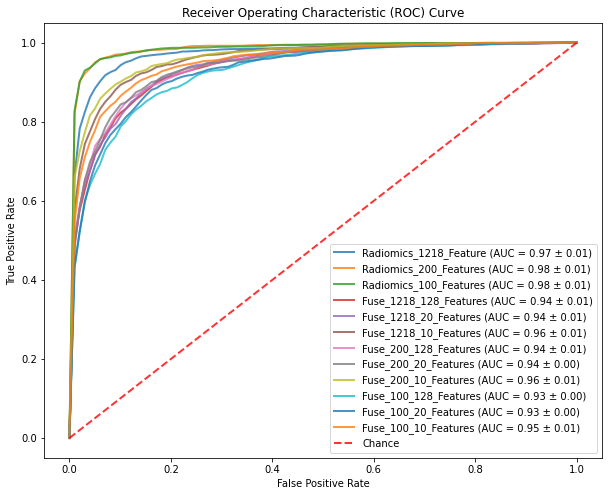

In [15]:

import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

print("## Augmented Model With Five-fold Validation Oversampling in Fold ##")
# ... [rest of your imports and setup code] ...

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

plt.figure(figsize=(10, 8))

for name, model_det in models.items():
    X = model_det[0]
    y = model_det[1]
    X_model_Test = model_det[2]
    best_accuracy = 0
    best_model = None
    best_precision = 0
    best_recall = 0
    best_f1 = 0
    best_auc = 0
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
   
    i = 1
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        oversampler = RandomOverSampler(random_state=42)
        X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

        RF = RandomForestClassifier(random_state=42, **rf_hyperparameters)
        RF.fit(X_train_resampled, y_train_resampled)

        y_pred = RF.predict(X_test)
        y_pred_proba = RF.predict_proba(X_test)[:, 1]
        
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_precision = precision
            best_recall = recall
            best_f1 = f1
            best_model = RF
            best_auc = roc_auc
        
        i += 1

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})', 
             lw=2, alpha=0.8)

    joblib.dump(best_model, f'Method_3_{name}_Augment.pkl')
    performance_metrics_Method6[name] = [best_accuracy, best_precision, best_recall, best_f1, best_auc]
    print(f"Training Best Performance of {name} model: Accuracy: {best_accuracy:.4f}, Precision: {best_precision:.4f}, Recall: {best_recall:.4f}, F1: {best_f1:.4f}, AUC: {best_auc:.4f}")
    
    y_pred_Test = best_model.predict(X_model_Test)
    y_pred_proba_Test = best_model.predict_proba(X_model_Test)[:, 1]
    
    df_predictions = pd.DataFrame({'Predicted Label': y_pred_Test})
    df_predictions.to_csv(f'Method_3Augment_{name}_predictions.csv', index=False)
    
    test_accuracy = accuracy_score(Test_Y_Aug, y_pred_Test)
    test_precision = precision_score(Test_Y_Aug, y_pred_Test)
    test_recall = recall_score(Test_Y_Aug, y_pred_Test)
    test_f1 = f1_score(Test_Y_Aug, y_pred_Test)
    
    fpr_test, tpr_test, _ = roc_curve(Test_Y_Aug, y_pred_proba_Test)
    test_auc = auc(fpr_test, tpr_test)
    
    print(f"Test Performance: Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}, AUC: {test_auc:.4f}")
    print("#" * 30)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('ROC_AUC_curve.png')
plt.show()

In [16]:
RM_ACC=0.9644# Radiomics_100
FUS_ACC=0.9289 #200_10
W1=0.9644/(0.9644+0.9289)
W2=0.9289/(0.9644+0.9289)
print(W1,W2)

0.5093751650557229 0.49062483494427717


In [17]:
RM=pd.read_csv('./Method_3Augment_Radiomics_100_Features_predictions.csv')
FUS=pd.read_csv('./Method_3Augment_Fuse_200_10_Features_predictions.csv')
RM = RM.replace({1: 1, 0: -1})
FUS= FUS.replace({1: 1, 0: -1})
pred=W1*RM['Predicted Label']+W2*FUS['Predicted Label']
#pred=pred.replace({1: 1, -1: 0})
print(pred.values)
print("Test Accuracy:",accuracy_score(Test_Y_Aug,pred.values))
print("Test precision:",precision_score(Test_Y_Aug,pred.values))
print("Test recall:",recall_score(Test_Y_Aug,pred.values))
print("Test F1:",f1_score(Test_Y_Aug,pred.values))

[-1.  1. -1. ... -1. -1. -1.]


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Assuming your true labels (Test_Y_Aug) are binary (0 or 1)
RM = pd.read_csv('./Method_3Augment_Radiomics_100_Features_predictions.csv')
FUS = pd.read_csv('./Method_3Augment_Fuse_200_10_Features_predictions.csv')

# Combine the predictions using a weighted average
pred = W1 * RM + W2 * FUS
print(pred)
# Calculate the Area Under the Receiver Operating Characteristic (ROC-AUC) score
auc_score = roc_auc_score(Test_Y_Aug, pred)
print("ROC-AUC Score:", auc_score)
print(pred)
# If you need binary predictions, you can apply a threshold
threshold = 0.5  # Adjust this value as needed
binary_pred = np.where(pred >= threshold, 1, 0)

# Now you can calculate classification metrics
print("Test Accuracy:", accuracy_score(Test_Y_Aug, binary_pred))
print("Test precision:", precision_score(Test_Y_Aug, binary_pred))
print("Test recall:", recall_score(Test_Y_Aug, binary_pred))
print("Test F1:", f1_score(Test_Y_Aug, binary_pred))

      Predicted Label
0                 0.0
1                 1.0
2                 0.0
3                 1.0
4                 0.0
...               ...
1119              0.0
1120              1.0
1121              0.0
1122              0.0
1123              0.0

[1124 rows x 1 columns]
ROC-AUC Score: 0.9487529701900922
      Predicted Label
0                 0.0
1                 1.0
2                 0.0
3                 1.0
4                 0.0
...               ...
1119              0.0
1120              1.0
1121              0.0
1122              0.0
1123              0.0

[1124 rows x 1 columns]
Test Accuracy: 0.9599644128113879
Test precision: 0.934156378600823
Test recall: 0.88671875
Test F1: 0.9098196392785571


(5620,) (1114,)
(5620,) (1114,) (1114,)
[1. 1. 1. ... 0. 0. 0.]
ROC-AUC Score: 0.9837300266663241
Test Accuracy: 0.9862989323843416
Test precision: 0.9818313953488372
Test recall: 0.9629365645046329
Test F1: 0.9722921914357683


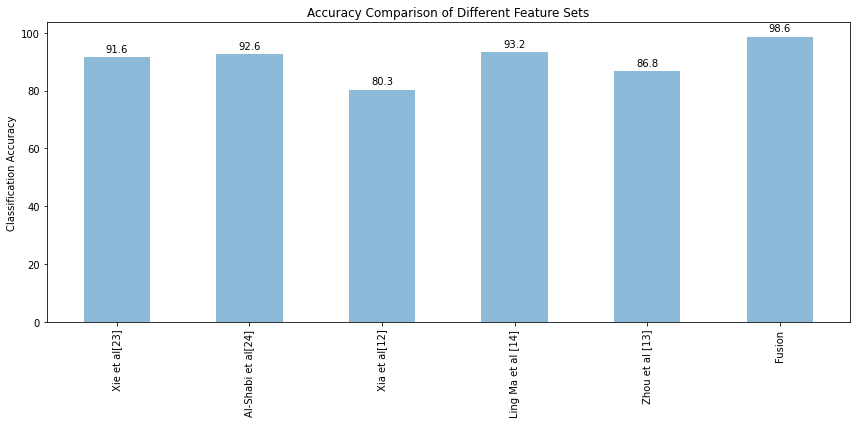

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['Xie et al[23]','Al-Shabi et al[24]','Xia et al[12]','Ling Ma et al [14]','Zhou et al [13]','Fusion']
accuracy = [91.6,92.57,80.3,93.25,86.83,98.63]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar chart
bar_positions = np.arange(len(methods))
bar_width = 0.5
bars = ax.bar(bar_positions, accuracy, bar_width, align='center', alpha=0.5)

# Set the x-axis tick labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(methods, rotation=90)
ax.set_title('Accuracy Comparison of Different Feature Sets')

#ax.set_grid(axis='y', linestyle='--', alpha=0.7)
# Set the y-axis label
ax.set_ylabel('Classification Accuracy')

# Add value labels to the bars
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    ax.annotate(f'{acc:.1f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

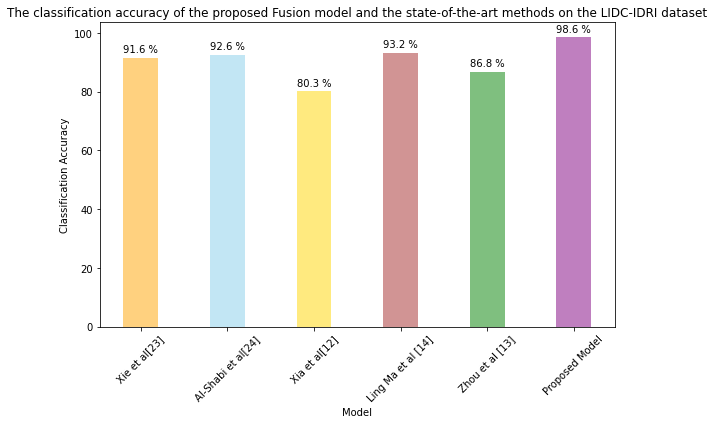

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
methods = ['Xie et al[23]','Al-Shabi et al[24]','Xia et al[12]','Ling Ma et al [14]','Zhou et al [13]','Proposed Model']
accuracy = [91.6,92.57,80.3,93.25,86.83,98.62]
colors = ['orange', 'skyblue', 'gold', 'brown', 'green', 'purple', 'olive', 'pink', 'crimson', 'teal', 'lightcoral', 'lightsalmon', 'red']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bar_positions = np.arange(len(methods))
bar_width = 0.4
bars = ax.bar(bar_positions, accuracy, bar_width, align='center', alpha=0.5, color=colors)

# Set the x-axis tick labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(methods, rotation=45)
ax.set_title('The classification accuracy of the proposed Fusion model and the state-of-the-art methods on the LIDC-IDRI dataset')

#ax.set_grid(axis='y', linestyle='--', alpha=0.7)
# Set the y-axis label
ax.set_ylabel('Classification Accuracy')
# Set the y-axis label
ax.set_ylabel('Classification Accuracy')
ax.set_xlabel('Model')
# Add value labels to the bars
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    ax.annotate(f'{acc:.1f} %',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
RM_ACC=0.9644# Radiomics_100
FUS_ACC=0.9289 #200_10
W1=0.9644/(0.9644+0.9289)
W2=0.9289/(0.9644+0.9289)
print(W1,W2)

0.5093751650557229 0.49062483494427717


(1393,)
[1. 1. 0. ... 0. 0. 0.]
ROC-AUC Score: 0.994085772175939
Test Accuracy: 0.9899497487437185
Test precision: 0.9715909090909091
Test recall: 0.9884393063583815
Test F1: 0.9799426934097422


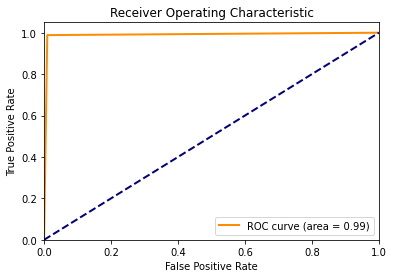

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
model_RN = joblib.load('./Method_3_Radiomics_100_Features_Augment.pkl')
model_FUS=joblib.load('./Method_3_Fuse_200_10_Features_Augment.pkl')

df_1=pd.read_csv('./Radiomics_Features_Base.csv')
df_2=pd.read_csv('./Deep_Learning_Features_Base.csv')
#print(df_2.head())
Test_Y_Aug=df_1['Malignancy']
RM_X=df_1[RM_100_top_feature_names]
X_200=df_1[RM_200_top_feature_names]
X_10=df_2[DL_10_top_feature_names]
print(Test_Y_Aug.shape)
FUS_X=pd.concat([X_200,X_10], axis=1)
#print(Test_Y_Aug.shape,RM.shape,FUS.shape)
RM=model_RN.predict(RM_X)
FUS=model_FUS.predict(FUS_X)
pred = W1 * RM + W2 * FUS
print(pred)
y_test_p=pd.DataFrame(pred)
y_test_p['Actual']=Test_Y_Aug
y_test_p['RM']=RM
y_test_p['FUS']=FUS
y_test_p.to_csv("My_TETS_RESULT.csv")
# Calculate the Area Under the Receiver Operating Characteristic (ROC-AUC) score
auc_score = roc_auc_score(Test_Y_Aug, pred)
print("ROC-AUC Score:", auc_score)

# If you need binary predictions, you can apply a threshold
threshold = 0.5  # Adjust this value as needed
binary_pred = np.where(pred >= threshold, 1, 0)

# Now you can calculate classification metrics
print("Test Accuracy:", accuracy_score(Test_Y_Aug, binary_pred))
print("Test precision:", precision_score(Test_Y_Aug, binary_pred))
print("Test recall:", recall_score(Test_Y_Aug, binary_pred))
print("Test F1:", f1_score(Test_Y_Aug, binary_pred))

fpr, tpr, thresholds = roc_curve(Test_Y_Aug, binary_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

(2431,)
[1. 1. 1. ... 0. 0. 0.]
ROC-AUC Score: 0.9840550485560174
Test Accuracy: 0.9798436857260386
Test precision: 0.992619926199262
Test recall: 0.971820809248555
Test F1: 0.982110259218693


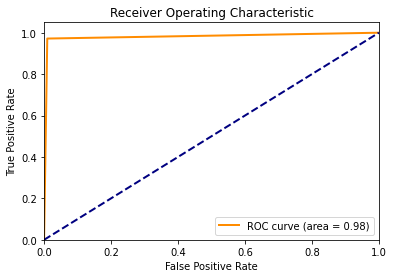

ROC-AUC Score: 0.9811348554361208
Test Accuracy: 0.9798436857260386
Test precision: 0.992619926199262
Test recall: 0.971820809248555
Test F1: 0.982110259218693
ROC-AUC Score: 0.9139134797467027
Test Accuracy: 0.9025092554504319
Test precision: 0.9965367965367965
Test recall: 0.8316473988439307
Test F1: 0.9066561638440331


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
model_RN = joblib.load('./Method_3_Radiomics_100_Features_Augment.pkl')
model_FUS=joblib.load('./Method_3_Fuse_200_10_Features_Augment.pkl')
performace_metrics={}
df_1=pd.read_csv('./Radiomics_Feature_1.csv')
df_2=pd.read_csv('./Deep_Learning_1.csv')
#print(df_2.head())
Test_Y_Aug=df_1['Malignancy']
RM_X=df_1[RM_100_top_feature_names]
X_200=df_1[RM_200_top_feature_names]
X_10=df_2[DL_10_top_feature_names]
print(Test_Y_Aug.shape)
FUS_X=pd.concat([X_200,X_10], axis=1)
#print(Test_Y_Aug.shape,RM.shape,FUS.shape)
RM=model_RN.predict(RM_X)
FUS=model_FUS.predict(FUS_X)
pred = W1 * RM + W2 * FUS
print(pred)
y_test_p=pd.DataFrame(pred)
y_test_p['Actual']=Test_Y_Aug
y_test_p['RM']=RM
y_test_p['FUS']=FUS
y_test_p.to_csv("My_TETS_RESULT.csv")
# Calculate the Area Under the Receiver Operating Characteristic (ROC-AUC) score
auc_score = roc_auc_score(Test_Y_Aug, pred)
print("ROC-AUC Score:", auc_score)

# If you need binary predictions, you can apply a threshold
threshold = 0.5  # Adjust this value as needed
binary_pred = np.where(pred >= threshold, 1, 0)

# Now you can calculate classification metrics
print("Test Accuracy:", accuracy_score(Test_Y_Aug, binary_pred))
print("Test precision:", precision_score(Test_Y_Aug, binary_pred))
print("Test recall:", recall_score(Test_Y_Aug, binary_pred))
print("Test F1:", f1_score(Test_Y_Aug, binary_pred))
performace_metrics['Ensemble Model']=[accuracy_score(Test_Y_Aug, binary_pred),precision_score(Test_Y_Aug, binary_pred),recall_score(Test_Y_Aug, binary_pred),f1_score(Test_Y_Aug, binary_pred),auc_score]
fpr, tpr, thresholds = roc_curve(Test_Y_Aug, binary_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Now you can calculate classification metrics
auc_score = roc_auc_score(Test_Y_Aug, RM)
print("ROC-AUC Score:", auc_score)
print("Test Accuracy:", accuracy_score(Test_Y_Aug, RM))
print("Test precision:", precision_score(Test_Y_Aug, RM))
print("Test recall:", recall_score(Test_Y_Aug, RM))
print("Test F1:", f1_score(Test_Y_Aug, RM))
performace_metrics['Radiomics']=[accuracy_score(Test_Y_Aug, RM),precision_score(Test_Y_Aug, RM),recall_score(Test_Y_Aug, RM),f1_score(Test_Y_Aug, RM),auc_score]

auc_score = roc_auc_score(Test_Y_Aug, FUS)
print("ROC-AUC Score:", auc_score)
print("Test Accuracy:", accuracy_score(Test_Y_Aug, FUS))
print("Test precision:", precision_score(Test_Y_Aug, FUS))
print("Test recall:", recall_score(Test_Y_Aug, FUS))
print("Test F1:", f1_score(Test_Y_Aug, FUS))
performace_metrics['Fusion ']=[accuracy_score(Test_Y_Aug, FUS),precision_score(Test_Y_Aug, FUS),recall_score(Test_Y_Aug, FUS),f1_score(Test_Y_Aug, FUS),auc_score]
fpr, tpr, thresholds = roc_curve(Test_Y_Aug, binary_pred)

In [ ]:
performace_metrics

{'Ensemble Model': [0.9599644128113879,
  0.934156378600823,
  0.88671875,
  0.9098196392785571,
  0.9487529701900922],
 'Radiomics': [0.9599644128113879,
  0.934156378600823,
  0.88671875,
  0.9098196392785571,
  0.9341427851382488],
 'Fusion ': [0.9154804270462633,
  0.8744186046511628,
  0.734375,
  0.7983014861995754,
  0.8516345046082949]}